# Rentabilidad del Menú

## Introducción

Este proyecto se enfoca en el análisis y optimización de la rentabilidad de los elementos del menú de un restaurante. Utilizando un conjunto de datos que proporciona información sobre las categorías de los elementos del menú, los ingredientes, los precios y los indicadores de rentabilidad, se busca identificar estrategias para maximizar la rentabilidad.

## Descripción del Conjunto de Datos

El conjunto de datos utilizado en este proyecto contiene la siguiente información:
- **RestaurantID**: Identificador del restaurante.
- **MenuCategory**: Categoría del elemento del menú (Aperitivos, Plato principal, Postres, Bebidas).
- **MenuItem**: Nombre del elemento del menú.
- **Ingredients**: Lista de ingredientes utilizados en el elemento del menú (datos confidenciales incluidos para las bebidas).
- **Price**: Precio del elemento del menú en dólares.
- **Profitability**: Variable objetivo que indica la rentabilidad del elemento del menú (alto/medio/bajo).

## Objetivos del Proyecto

El objetivo principal de este proyecto es analizar los factores que influyen en la rentabilidad de los elementos del menú y proponer estrategias para optimizar dicha rentabilidad. Para lograrlo, se llevarán a cabo las siguientes actividades:

### 1. Análisis de Rentabilidad
**Objetivo**: Identificar los factores que influyen en la rentabilidad de los elementos del menú. 

**Actividades**: 
- Análisis exploratorio de datos (EDA) para entender la distribución de la rentabilidad en diferentes categorías de menú.
- Distribución de rentabilidad por categoría de menu.
- Visualizaciones de la rentabilidad por categoría y precio.

### 2. Clasificación de Rentabilidad
**Objetivo**: Desarrollar un modelo de clasificación para predecir la rentabilidad de los nuevos elementos del menú.

**Actividades**:
- Preprocesamiento de datos, incluyendo la codificación de variables categóricas y manejo de datos confidenciales.
- Entrenamiento de modelos de clasificación (e.g., Random Forest, SVM) para predecir la rentabilidad.
- Evaluación de modelos y selección del mejor modelo basado en métricas de desempeño.



___________________________________________________________________________________


### 1. Análisis de Rentabilidad


#### Análisis exploratorio de datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargamos y imprimimos el data frame 

df_original = pd.read_csv("menu_data.csv")
df = df_original.copy()
df

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium
...,...,...,...,...,...,...
995,R003,Beverages,Soda,['confidential'],2.16,Low
996,R001,Appetizers,Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.86,Medium
997,R003,Main Course,Vegetable Stir-Fry,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",20.57,High
998,R002,Desserts,Tiramisu,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.80,High


In [3]:
# Descripción estadística de las variables cuantitativas (Price)

df_descripcion = df.describe()
df_descripcion

,Price
count,1000.00000
mean,12.81801
std,7.41713
min,2.01000
25%,4.86750
50%,12.53500
75%,17.69000
max,29.84000


In [4]:
# Información de las columnas, su tipo y valores nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


#### Visualización de la distribución de las categorías del menu

In [5]:
# Guardamos En una variable, distribución de la rentabilidad en diferentes categorías

df_cat_distribution = df["MenuCategory"].value_counts()
df_cat_distribution

MenuCategory
Beverages      264
Desserts       256
Appetizers     254
Main Course    226
Name: count, dtype: int64

<Axes: xlabel='MenuCategory', ylabel='count'>

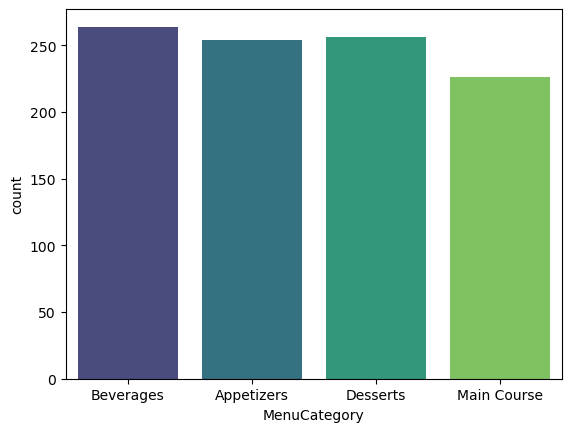

In [6]:
sns.countplot(data=df, x="MenuCategory", palette="viridis")

#### Distribución de rentabilidad por categoría de menu

In [7]:
# Creamos variable con distribución de rentabilidad por categoría de menu

prob_cat_menu = pd.pivot_table(
    data = df,
    index = "MenuCategory",
    columns = "Profitability",
    aggfunc = "size"
)

prob_cat_menu


Profitability,High,Low,Medium
MenuCategory,,,
Appetizers,106,8,140
Beverages,12,90,162
Desserts,125,9,122
Main Course,143,12,71


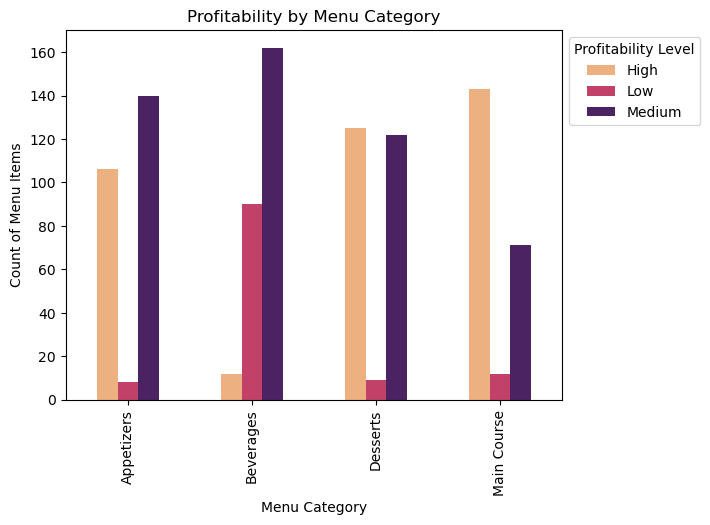

In [15]:
# Visualizamos la variable de distribución de rentabilidad por categoría de menu

prob_cat_menu.plot(kind="bar", colormap="flare")

plt.title("Profitability by Menu Category")
plt.xlabel("Menu Category")
plt.ylabel("Count of Menu Items")

plt.legend(title="Profitability Level", bbox_to_anchor=(1, 1))

plt.show()

#### Distribución de Precios por Categoría de Menú

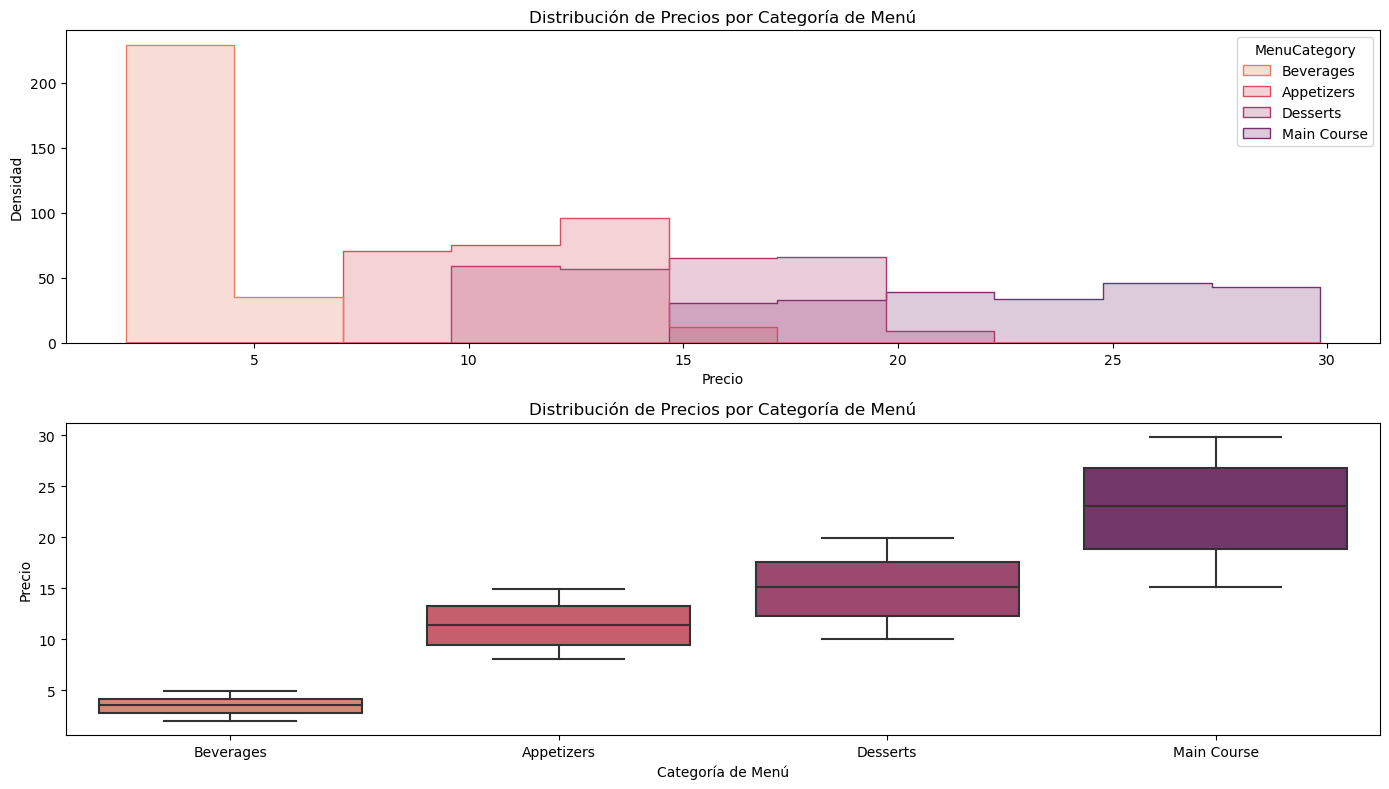

In [16]:
plt.figure(figsize=(14, 8))

# Histograma de precios por categoría de menú
plt.subplot(2, 1, 1)
sns.histplot(data=df, x="Price", hue="MenuCategory", element="step", palette="flare")
plt.title("Distribución de Precios por Categoría de Menú")
plt.xlabel("Precio")
plt.ylabel("Densidad")

# Boxplot de precios por categoría de menú
plt.subplot(2, 1, 2)
sns.boxplot(data=df, x="MenuCategory", y="Price", palette="flare")
plt.title("Distribución de Precios por Categoría de Menú")
plt.xlabel("Categoría de Menú")
plt.ylabel("Precio")

plt.tight_layout()

plt.show()

### 2. Clasificación de Rentabilidad


**Para utilizar scikit-learn en la clasificación de rentabilidad, vamos a seguir los siguientes pasos:**

1. Preprocesamiento de Datos: Convertir las variables categóricas en variables numéricas.
2. División de Datos: Dividir los datos en conjuntos de entrenamiento y prueba.
3. Entrenamiento del Modelo: Entrenar un modelo de clasificación con scikit-learn.
4. Evaluación del Modelo: Evaluar el modelo utilizando métricas apropiadas.


---------------------------------------------------------------------------------------

#### Preprocesamiento de Datos

In [17]:
from sklearn.preprocessing import LabelEncoder

# Convertir variables categóricas a numéricas
label_encoder = LabelEncoder()

# Codificar 'MenuCategory' y 'Profitability'
df["MenuCategory"] = label_encoder.fit_transform(df["MenuCategory"])
df["Profitability"] = label_encoder.fit_transform(df["Profitability"])

df.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,1,Soda,['confidential'],2.55,1
1,R001,0,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,2
2,R003,2,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,0
3,R003,3,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,0
4,R002,3,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,2


#### División de Datos

In [11]:
from sklearn.model_selection import train_test_split

# Variables independientes (X) y dependiente (y)
X = df[["MenuCategory", "Price"]]
y = df["Profitability"]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Entrenamiento del Modelo

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#### Evaluación del Modelo

In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Predecir los valores de prueba
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Precisión: {accuracy}")
print("Reporte de Clasificación:\n", report)


Precisión: 0.8666666666666667
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       119
           1       0.73      0.56      0.63        34
           2       0.88      0.92      0.90       147

    accuracy                           0.87       300
   macro avg       0.83      0.79      0.81       300
weighted avg       0.86      0.87      0.86       300



## Conclusión


En este proyecto, hemos abordado la optimización de la rentabilidad del menú en un conjunto de restaurantes. A partir de los datos disponibles, hemos realizado un análisis exhaustivo que incluye la limpieza de datos, la exploración y visualización de las distribuciones de precios por categoría de menú y la clasificación de la rentabilidad de los ítems del menú utilizando técnicas de aprendizaje automático.

### Resultados Obtenidos

1. **Limpieza de Datos**: Los datos fueron limpiados y preparados adecuadamente para el análisis, incluyendo la conversión de variables categóricas a numéricas.
2. **Visualización de Datos**: Se realizaron visualizaciones que nos permitieron entender mejor la distribución de los precios por categorías de menú, lo que proporcionó valiosas perspectivas sobre la estructura de los precios en los diferentes restaurantes.
3. **Modelo de Clasificación**: Utilizamos un modelo de clasificación Random Forest para predecir la rentabilidad de los ítems del menú. El modelo alcanzó una precisión del 86.67%, lo que indica un buen desempeño en la predicción de la rentabilidad.
   - **Precisión por Clase**:
     - Clase 0 (Baja Rentabilidad): 88%
     - Clase 1 (Media Rentabilidad): 73%
     - Clase 2 (Alta Rentabilidad): 88%

### Interpretación de los Resultados

El modelo Random Forest ha demostrado ser eficaz para clasificar la rentabilidad de los ítems del menú. La alta precisión alcanzada sugiere que las características seleccionadas (categoría del menú y precio) son buenas predictoras de la rentabilidad.

### Conclusión Final

Este proyecto ha proporcionado una visión clara y detallada de cómo los métodos de análisis de datos y el aprendizaje automático pueden aplicarse para optimizar la rentabilidad de los ítems del menú en restaurantes. Los resultados obtenidos son prometedores y abren la puerta a futuros estudios y mejoras continuas en la toma de decisiones basadas en datos en el sector de la restauración.

